In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('nyc_taxi_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pickup_datetime       40000 non-null  object 
 1   dropoff_datetime      40000 non-null  object 
 2   trip_distance         40000 non-null  float64
 3   fare_amount           40000 non-null  float64
 4   tip_amount            40000 non-null  float64
 5   tolls_amount          40000 non-null  float64
 6   surcharges_and_taxes  40000 non-null  float64
 7   total_amount          40000 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.4+ MB


In [3]:
df.describe()

,trip_distance,fare_amount,tip_amount,tolls_amount,surcharges_and_taxes,total_amount
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,6.520943,23.281150,5.221019,1.387937,0.799580,33.482444
std,4.621074,11.919331,3.471046,2.706407,0.014691,16.017329
min,0.500000,11.500000,0.000000,0.000000,0.000000,12.300000
25%,2.630000,14.000000,3.000000,0.000000,0.800000,20.362500
50%,5.925000,18.500000,4.060000,0.000000,0.800000,26.390000
75%,9.600000,32.000000,7.320000,0.000000,0.800000,45.650000
max,44.740000,132.000000,100.620000,24.550000,0.800000,155.100000


In [ ]:
# Tarihleri datetime formatına çevir.

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
# Yolculuk süresini hesapla ve yeni kolon olarak kaydet.

In [11]:
df['trip_duration'] = ((df.dropoff_datetime - df.pickup_datetime).dt.total_seconds() / 60).round(3)

In [12]:
df.head()

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,tip_amount,tolls_amount,surcharges_and_taxes,total_amount,trip_duration
0,2022-11-22 23:34:51+00:00,2022-11-22 23:49:24+00:00,5.50,16.5,5.35,6.55,0.8,32.20,14.550
1,2022-11-10 17:57:22+00:00,2022-11-10 18:14:15+00:00,4.72,16.5,3.66,0.00,0.8,21.96,16.883
2,2022-11-18 16:04:35+00:00,2022-11-18 16:28:37+00:00,3.00,16.5,3.66,0.00,0.8,21.96,24.033
3,2022-11-21 17:14:13+00:00,2022-11-21 17:36:40+00:00,4.50,16.5,3.66,0.00,0.8,21.96,22.450
4,2022-11-17 11:55:46+00:00,2022-11-17 12:14:05+00:00,4.55,16.5,4.32,0.00,0.8,21.62,18.317


In [ ]:
# Trip Duration için Outlier verileri tespit et ve temizle.

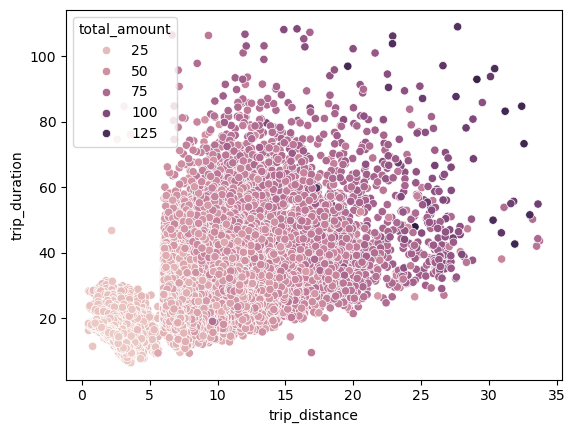

In [43]:
sns.scatterplot(x='trip_distance',y='trip_duration',data=df, hue='total_amount')
plt.show()

In [41]:
duration_outlier = list(df[df['trip_duration']>110].index)

In [42]:
df.drop(index=duration_outlier, axis=0, inplace=True)

In [20]:
minus_durations = list(df[df['trip_duration']<0.5].index)

In [21]:
df.drop(index=minus_durations, axis=0, inplace=True)

In [38]:
df.describe()

,trip_distance,fare_amount,tip_amount,tolls_amount,surcharges_and_taxes,total_amount,trip_duration
count,39909.000000,39909.000000,39909.000000,39909.000000,39909.000000,39909.000000,39909.000000
mean,6.508113,23.251134,5.214573,1.387299,0.799592,33.445703,25.282339
std,4.580995,11.834734,3.419127,2.704932,0.014494,15.911902,11.981731
min,0.500000,11.500000,0.000000,0.000000,0.000000,12.300000,6.467000
25%,2.630000,14.000000,3.000000,0.000000,0.800000,20.300000,16.850000
50%,5.470000,16.500000,4.060000,0.000000,0.800000,26.390000,21.667000
75%,9.600000,32.000000,7.320000,0.000000,0.800000,45.650000,30.133000
max,33.710000,96.500000,70.000000,24.550000,0.800000,141.050000,132.167000


In [ ]:
# Trip distance için outlier tespiti

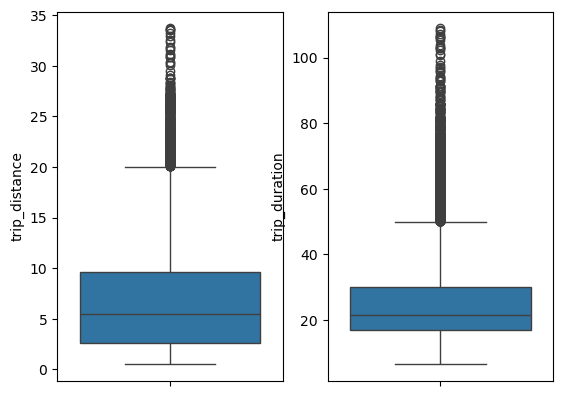

In [44]:
plt.subplot(1,2,1)
sns.boxplot(y='trip_distance',data=df)
plt.subplot(1,2,2)
sns.boxplot(y='trip_duration',data=df)
plt.show()

In [32]:
distance_outliers =list(df[df['trip_distance']>34].index)
df.drop(index=distance_outliers, axis=0, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39901 entries, 0 to 39999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   pickup_datetime       39901 non-null  datetime64[ns, UTC]
 1   dropoff_datetime      39901 non-null  datetime64[ns, UTC]
 2   trip_distance         39901 non-null  float64            
 3   fare_amount           39901 non-null  float64            
 4   tip_amount            39901 non-null  float64            
 5   tolls_amount          39901 non-null  float64            
 6   surcharges_and_taxes  39901 non-null  float64            
 7   total_amount          39901 non-null  float64            
 8   trip_duration         39901 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(7)
memory usage: 3.0 MB


<Axes: >

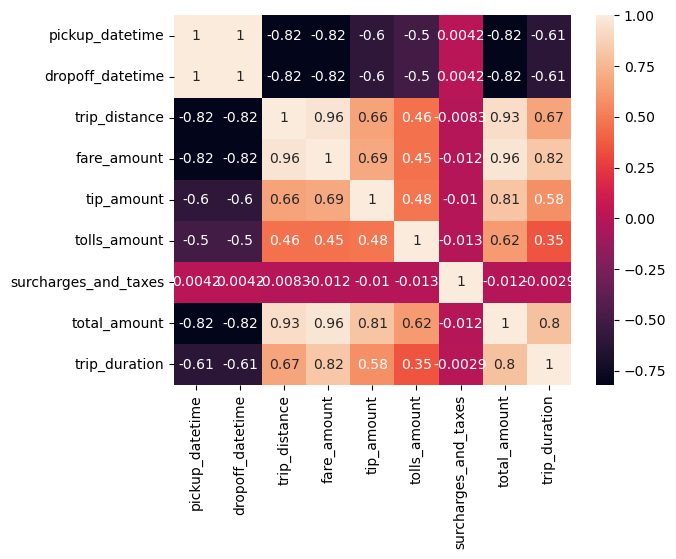

In [46]:
sns.heatmap(df.corr(),annot=True)

In [47]:
df.head()

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,tip_amount,tolls_amount,surcharges_and_taxes,total_amount,trip_duration
0,2022-11-22 23:34:51+00:00,2022-11-22 23:49:24+00:00,5.50,16.5,5.35,6.55,0.8,32.20,14.550
1,2022-11-10 17:57:22+00:00,2022-11-10 18:14:15+00:00,4.72,16.5,3.66,0.00,0.8,21.96,16.883
2,2022-11-18 16:04:35+00:00,2022-11-18 16:28:37+00:00,3.00,16.5,3.66,0.00,0.8,21.96,24.033
3,2022-11-21 17:14:13+00:00,2022-11-21 17:36:40+00:00,4.50,16.5,3.66,0.00,0.8,21.96,22.450
4,2022-11-17 11:55:46+00:00,2022-11-17 12:14:05+00:00,4.55,16.5,4.32,0.00,0.8,21.62,18.317


In [48]:
# Günler ve seyahat saatleri kolonlarını oluşturalım. 

In [56]:
df['trip_hours'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day_name()

In [57]:
df.head()

,pickup_datetime,dropoff_datetime,trip_distance,fare_amount,tip_amount,tolls_amount,surcharges_and_taxes,total_amount,trip_duration,trip_hours,day
0,2022-11-22 23:34:51+00:00,2022-11-22 23:49:24+00:00,5.50,16.5,5.35,6.55,0.8,32.20,14.550,23,Tuesday
1,2022-11-10 17:57:22+00:00,2022-11-10 18:14:15+00:00,4.72,16.5,3.66,0.00,0.8,21.96,16.883,17,Thursday
2,2022-11-18 16:04:35+00:00,2022-11-18 16:28:37+00:00,3.00,16.5,3.66,0.00,0.8,21.96,24.033,16,Friday
3,2022-11-21 17:14:13+00:00,2022-11-21 17:36:40+00:00,4.50,16.5,3.66,0.00,0.8,21.96,22.450,17,Monday
4,2022-11-17 11:55:46+00:00,2022-11-17 12:14:05+00:00,4.55,16.5,4.32,0.00,0.8,21.62,18.317,11,Thursday


In [58]:
# Günler ve saatler için grafikler

C:\Users\ert\AppData\Local\Temp\ipykernel_6364\138427367.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['trip_hours'],y=df['total_amount'],palette='Set1')


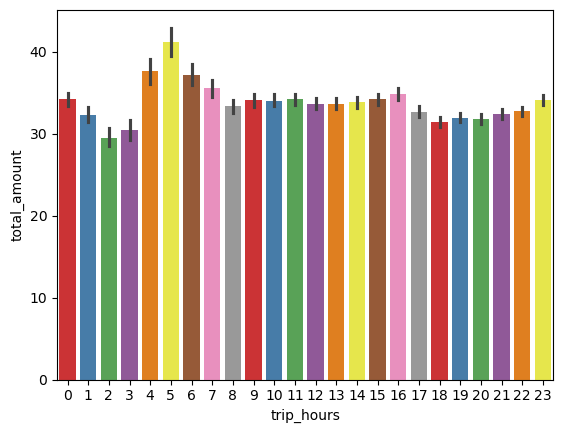

In [61]:
sns.barplot(x=df['trip_hours'],y=df['total_amount'],palette='Set1')
plt.show()

C:\Users\ert\AppData\Local\Temp\ipykernel_6364\2232094838.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['day'],y=df['total_amount'],palette='Set1')


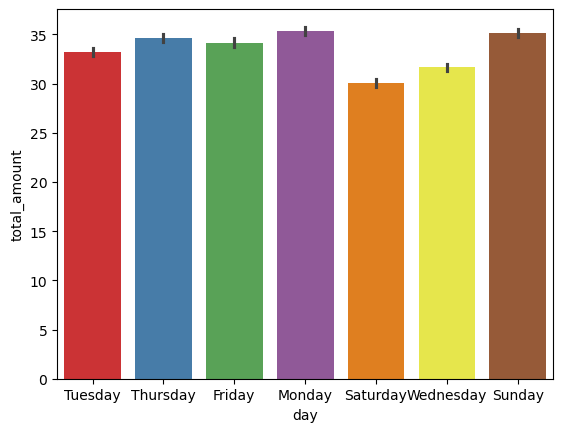

In [62]:
sns.barplot(x=df['day'],y=df['total_amount'],palette='Set1')
plt.show()

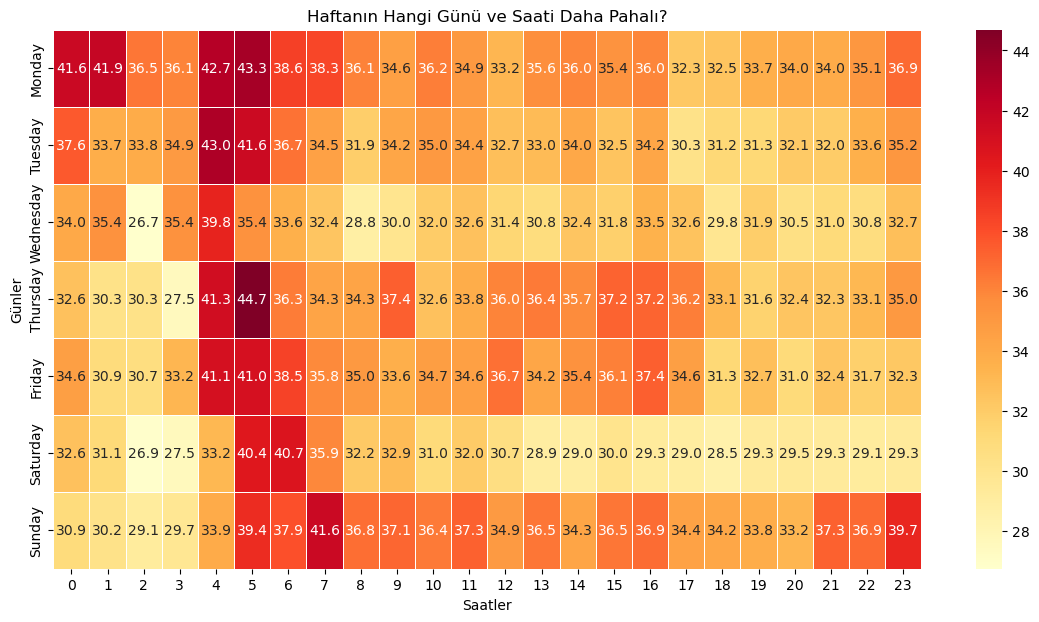

In [68]:
pivot_table = df.pivot_table(index='day', columns='trip_hours', values='total_amount', aggfunc='mean')

# Günleri doğru sıraya dizelim
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)

# 2. Isı Haritası Çiz
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=.5)
plt.title('Haftanın Hangi Günü ve Saati Daha Pahalı?')
plt.xlabel('Saatler')
plt.ylabel('Günler')
plt.show()

In [70]:
# Datetime kolonları sil.

In [73]:
df.drop(columns=['pickup_datetime','dropoff_datetime'],axis=1, inplace=True)

In [74]:
df.head()

,trip_distance,fare_amount,tip_amount,tolls_amount,surcharges_and_taxes,total_amount,trip_duration,trip_hours,day
0,5.50,16.5,5.35,6.55,0.8,32.20,14.550,23,Tuesday
1,4.72,16.5,3.66,0.00,0.8,21.96,16.883,17,Thursday
2,3.00,16.5,3.66,0.00,0.8,21.96,24.033,16,Friday
3,4.50,16.5,3.66,0.00,0.8,21.96,22.450,17,Monday
4,4.55,16.5,4.32,0.00,0.8,21.62,18.317,11,Thursday


In [75]:
# Fare amount ve tip amount sil. Overfitting engellemek için, silmezsek model direkt fare amount'a göre cevaplayabilir.

In [76]:
df.drop(columns=['fare_amount','tip_amount'],axis=1, inplace=True)

In [77]:
# surcharges kısmını drop etmeli mi etmemeli mi?

In [78]:
df.surcharges_and_taxes.value_counts()

surcharges_and_taxes
0.8    39870
0.3       30
0.0        1
Name: count, dtype: int64

In [79]:
df.drop(columns=['surcharges_and_taxes'],axis=1, inplace=True)

In [80]:
df.head()

,trip_distance,tolls_amount,total_amount,trip_duration,trip_hours,day
0,5.50,6.55,32.20,14.550,23,Tuesday
1,4.72,0.00,21.96,16.883,17,Thursday
2,3.00,0.00,21.96,24.033,16,Friday
3,4.50,0.00,21.96,22.450,17,Monday
4,4.55,0.00,21.62,18.317,11,Thursday


In [90]:
df.tolls_amount.value_counts()

tolls_amount
0.00     31471
6.55      8218
3.00        84
13.10       30
8.36        16
2.45        11
9.55         8
9.00         6
6.12         6
13.75        6
7.80         4
4.90         4
11.75        3
11.55        3
2.50         2
1.00         2
8.55         2
6.00         2
23.50        2
5.00         1
15.05        1
10.00        1
18.10        1
19.65        1
1.25         1
15.00        1
12.00        1
8.75         1
6.56         1
10.17        1
20.30        1
24.55        1
12.55        1
20.75        1
2.00         1
6.85         1
11.17        1
11.05        1
13.55        1
7.55         1
Name: count, dtype: int64

In [91]:
df['is_tolls'] = (df['tolls_amount'] > 0).astype(int)

In [93]:
df.drop('tolls_amount', axis=1, inplace=True)

In [94]:
df.head()

,trip_distance,total_amount,trip_duration,trip_hours,day,is_tolls
0,5.50,32.20,14.550,23,Tuesday,1
1,4.72,21.96,16.883,17,Thursday,0
2,3.00,21.96,24.033,16,Friday,0
3,4.50,21.96,22.450,17,Monday,0
4,4.55,21.62,18.317,11,Thursday,0


In [95]:
df.describe()

,trip_distance,total_amount,trip_duration,trip_hours,is_tolls
count,39901.000000,39901.000000,39901.000000,39901.000000,39901.000000
mean,6.505668,33.431108,25.263059,14.183078,0.211273
std,4.577452,15.878306,11.904826,5.944218,0.408217
min,0.500000,12.300000,6.467000,0.000000,0.000000
25%,2.630000,20.300000,16.833000,10.000000,0.000000
50%,5.450000,26.390000,21.667000,15.000000,0.000000
75%,9.600000,45.650000,30.117000,19.000000,0.000000
max,33.710000,141.050000,108.983000,23.000000,1.000000


In [96]:
df.to_csv('final.csv',index=False)